In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset=pd.read_csv("diabetic_data.csv")
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['number_diagnoses'],test_size=0.1,random_state=0)

In [10]:
# X_train.shape, X_test.shape

In [11]:
print((dataset.astype(str) != '?').all(axis=0))

encounter_id                 True
patient_nbr                  True
race                        False
gender                       True
age                          True
weight                      False
admission_type_id            True
discharge_disposition_id     True
admission_source_id          True
time_in_hospital             True
payer_code                  False
medical_specialty           False
num_lab_procedures           True
num_procedures               True
num_medications              True
number_outpatient            True
number_emergency             True
number_inpatient             True
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses             True
max_glu_serum                True
A1Cresult                    True
metformin                    True
repaglinide                  True
nateglinide                  True
chlorpropamide               True
glimepiride                  True
acetohexamide 

In [13]:
dataset["weight"].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [38]:
dataset['weight'].replace(["?"],['nan'],inplace=True)
dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [17]:
dataset['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [39]:
dataset['race'].replace(["?"],['nan'],inplace=True)

In [40]:
dataset['payer_code'].value_counts()

NaN    40256
MC     32439
HM      6274
SP      5007
BC      4655
MD      3532
CP      2533
UN      2448
CM      1937
OG      1033
PO       592
DM       549
CH       146
WC       135
OT        95
MP        79
SI        55
FR         1
Name: payer_code, dtype: int64

In [41]:
dataset['payer_code'].replace(["?"],['nan'],inplace=True)

In [42]:
dataset['medical_specialty'].value_counts()

NaN                       49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
                          ...  
Dermatology                   1
SportsMedicine                1
Speech                        1
Proctology                    1
Neurophysiology               1
Name: medical_specialty, Length: 73, dtype: int64

In [43]:
dataset['medical_specialty'].replace(["?"],['nan'],inplace=True)

In [44]:
dataset['diag_1'].value_counts()

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
381       1
363       1
57        1
217       1
605       1
Name: diag_1, Length: 717, dtype: int64

In [45]:
dataset['diag_1'].replace(["?"],['nan'],inplace=True)

In [46]:
dataset['diag_2'].value_counts()

276    6752
428    6662
250    6071
427    5036
401    3736
       ... 
871       1
974       1
316       1
66        1
975       1
Name: diag_2, Length: 749, dtype: int64

In [47]:
dataset['diag_2'].replace(["?"],['nan'],inplace=True)

In [48]:
dataset['diag_3'].replace(["?"],['nan'],inplace=True)

In [49]:
dataset.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [121]:
dataset.drop(['encounter_id'], axis=1, inplace=True)

In [122]:
features_with_na = dataset[['race','weight','payer_code','medical_specialty','diag_1','diag_2','diag_3']]

# Missing Values

In [123]:
# features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
# features_with_na=[features for features in dataset.columns if dataset[features].astype('O') != 'NaN'.all()>1]
## 2- step print the feature name and the percentage of missing values .astype(str) != 'NaN').all(axis=0)

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

race 0.0  % missing values
weight 0.0  % missing values
payer_code 0.0  % missing values
medical_specialty 0.0  % missing values
diag_1 0.0  % missing values
diag_2 0.0  % missing values
diag_3 0.0  % missing values


In [124]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  12


,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,8222157,6,25,1,1,41,0,1,0,0,0,1
1,55629189,1,1,7,3,59,0,18,0,0,0,9
2,86047875,1,1,7,2,11,5,13,2,0,1,6
3,82442376,1,1,7,2,44,1,16,0,0,0,7
4,42519267,1,1,7,1,51,0,8,0,0,0,5


In [125]:
ID_feature = [feature for feature in numerical_features if 'id' in feature or 'ID' in feature and feature not in ['encounter_id']]

ID_feature

['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

In [126]:
# let's explore the content of these year variables
for feature in ID_feature:
    print(feature, dataset[feature].unique())

admission_type_id [6 1 2 3 4 5 8 7]
discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]


Text(0.5, 1.0, 'Number of diagnoses')

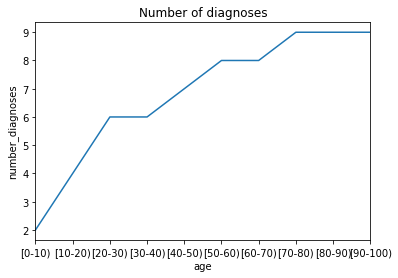

In [131]:
dataset.groupby('age')['number_diagnoses'].median().plot()
plt.xlabel('age')
plt.ylabel('number_diagnoses')
plt.title("Number of diagnoses")

In [151]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<200 and feature not in ID_feature+['encounter_id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 8


In [152]:
discrete_feature

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [153]:
dataset[discrete_feature].head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1,41,0,1,0,0,0,1
1,3,59,0,18,0,0,0,9
2,2,11,5,13,2,0,1,6
3,2,44,1,16,0,0,0,7
4,1,51,0,8,0,0,0,5


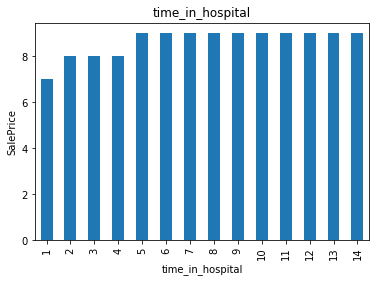

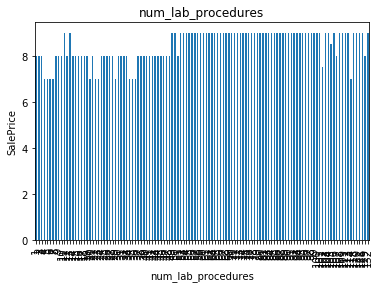

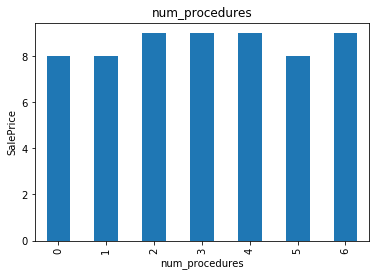

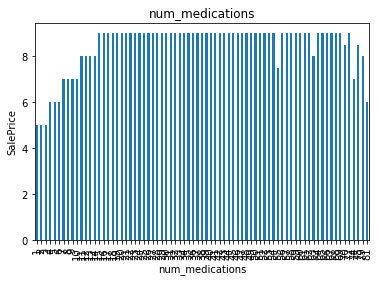

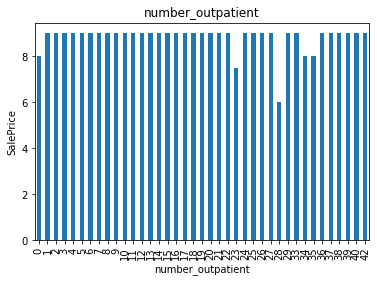

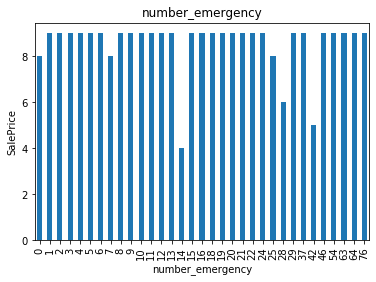

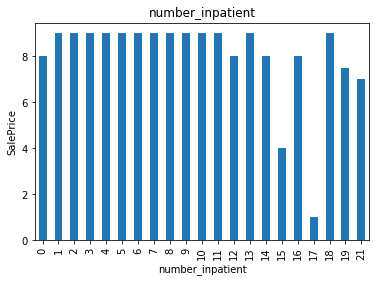

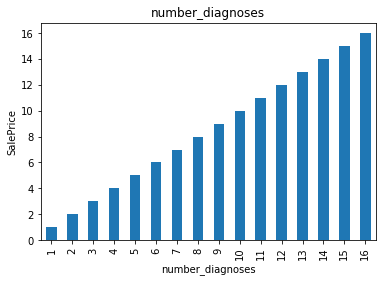

In [154]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['number_diagnoses'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [155]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+ID_feature+['encounter_id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1


In [156]:
continuous_feature

['patient_nbr']

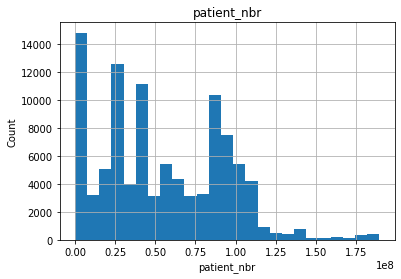

In [157]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [158]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [159]:
dataset[categorical_features].head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,NaN,Pediatrics-Endocrinology,250.83,NaN,NaN,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,NaN,NaN,276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,NaN,NaN,648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,NaN,NaN,8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,NaN,NaN,197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [160]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is race and number of categories are 6
The feature is gender and number of categories are 3
The feature is age and number of categories are 10
The feature is weight and number of categories are 10
The feature is payer_code and number of categories are 18
The feature is medical_specialty and number of categories are 73
The feature is diag_1 and number of categories are 717
The feature is diag_2 and number of categories are 749
The feature is diag_3 and number of categories are 790
The feature is max_glu_serum and number of categories are 4
The feature is A1Cresult and number of categories are 4
The feature is metformin and number of categories are 4
The feature is repaglinide and number of categories are 4
The feature is nateglinide and number of categories are 4
The feature is chlorpropamide and number of categories are 4
The feature is glimepiride and number of categories are 4
The feature is acetohexamide and number of categories are 2
The feature is glipizide and number 

In [168]:
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

race 0.0  % missing values
weight 0.0  % missing values
payer_code 0.0  % missing values
medical_specialty 0.0  % missing values
diag_1 0.0  % missing values
diag_2 0.0  % missing values
diag_3 0.0  % missing values


In [172]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

KeyError: 'LotFrontage'